In [3]:
import numpy as np
import tensorflow as tf
#from  tensorflow import  keras
#from tensorflow.keras import Sequential 
#from tensorflow.keras.layers import Activation, Dense
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing

ImportError: Traceback (most recent call last):
  File "C:\Users\ASCHLAUC\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\ASCHLAUC\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\ASCHLAUC\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\Anaconda\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\Anaconda\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [35]:
np.random.seed(42)
fFloat  = open("/usr/datasets/BostonFeature.csv","r")
X = np.loadtxt(fFloat, delimiter=","); fFloat.close()
fFloat  = open("/usr/datasets/BostonTarget.csv","r")
Y = np.loadtxt(fFloat, delimiter=","); fFloat.close()

In [44]:
# Struktur ansehen
print("Data shape:", X.shape)
print("Data shape:", Y.shape)

Data shape: (506, 13)
Data shape: (506,)


In [ ]:
Normalisieren und Trainings-/Testsätze erzeugen

In [39]:
yMin = Y.min(axis=0); yMax = Y.max(axis=0) 
Y = (Y - yMin) / (yMax - yMin) 
TrainSet     = np.random.choice(X.shape[0],int(X.shape[0]*0.80), replace=False)
XTrain       = X[TrainSet,:] 
YTrain       = Y[TrainSet]
TestSet      = np.delete(np.arange(0, len(Y) ), TrainSet) 
XTest        = X[TestSet,:]
YTest        = Y[TestSet]

In [51]:
modell = Sequential()
modell.add(Dense(10,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))


In [52]:
modell = Sequential()
modell.add(Dense(10,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
modell.add(Dense(10,kernel_initializer='random_uniform',activation='relu',use_bias=False))
modell.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))
modell.compile(loss='mean_squared_error', optimizer='adam')
history = modell.fit(XTrain,YTrain, epochs=1000, verbose=False)

In [50]:
yp = modell.predict(XTest)
yp = yp.reshape(yp.shape[0])
errorT = (yMax - yMin)*(yp - YTest)
print(np.mean(np.abs(errorT)))

2.386317143019508


In [27]:
modell = Sequential()
modell.add(Dense(10,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
modell.add(Dense(10,kernel_initializer='random_uniform',activation='relu',use_bias=False))
modell.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))
modell.compile(loss='mean_squared_error', optimizer='adam')

def divValTrainSet(X,Y):
    ValSet    = np.random.choice(X.shape[0],int(X.shape[0]*0.25),replace=False)
    TrainSet  = np.delete(np.arange(0, Y.shape[0] ), ValSet) 
    XVal     = X[ValSet,:]
    YVal     = Y[ValSet]
    X        = X[TrainSet,:]
    Y        = Y[TrainSet]
    return (XVal, YVal, X, Y)
(XVal, YVal, XTr, YTr) = divValTrainSet(XTrain,YTrain)

In [28]:
earlystop  = keras.callbacks.EarlyStopping(monitor='loss', patience=20, verbose=False)
checkpoint = keras.callbacks.ModelCheckpoint('bestW.h5', monitor='loss', verbose=False, save_weights_only=True, save_best_only=True)
callbacksList = [earlystop, checkpoint] 


In [29]:
history = modell.fit(XTr,YTr, epochs=1000, validation_data=(XVal, YVal), callbacks=callbacksList, verbose=False)

In [30]:
import matplotlib.pyplot as plt
lossMonitor = np.array(history.history['loss'])
valLossMonitor = np.array(history.history['val_loss'])
counts = np.arange(lossMonitor.shape[0])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(counts,lossMonitor,'k', label='Trainingsdaten')
ax.plot(counts,valLossMonitor,'r:', label='Validierungsdaten')
ax.set_xlabel('Lernzyklus')
ax.set_ylabel('Fehler')
ax.legend()

In [31]:
modell.load_weights('bestW.h5')
yp = modell.predict(XTest)
yp = yp.reshape(yp.shape[0])
errorT = (yMax - yMin)*(yp - YTest)
print(np.mean(np.abs(errorT)))

3.3331295630511124


In [32]:
yp = modell.predict(XTrain)
yp = yp.reshape(yp.shape[0])
error = (yMax - yMin)*(yp - YTrain)
print(np.mean(np.abs(error)))

3.306114512379512


Text(0, 0.5, 'Anzahl')

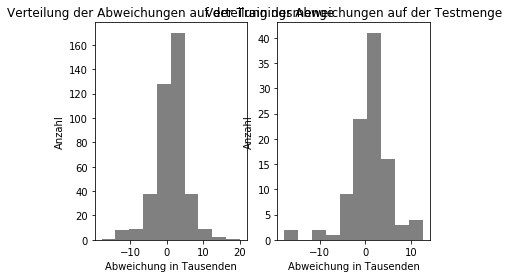

In [33]:

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Verteilung der Abweichungen auf der Trainingsmenge')
ax.hist(error,color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl')
ax = fig.add_subplot(1,2,2)
ax.set_title('Verteilung der Abweichungen auf der Testmenge')
ax.hist(errorT,color='gray')
ax.set_xlabel('Abweichung in Tausenden')
ax.set_ylabel('Anzahl')
